In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/PIA23-24/tema3/datasetkaggle/children anemia.csv'))
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [7]:
df.isna().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

In [8]:
df['Currently residing with husband/partner'].unique()

array(['Staying elsewhere', 'Living with her', nan], dtype=object)

In [9]:
df = df.drop('Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 1)
df = df.drop('When child put to breast', 1)
df = df.drop('Hemoglobin level adjusted for altitude (g/dl - 1 decimal)', 1)
df = df.drop('Anemia level.1', 1)
df

<ipython-input-9-a1f95833ca4d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 1)
<ipython-input-9-a1f95833ca4d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('When child put to breast', 1)
<ipython-input-9-a1f95833ca4d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Hemoglobin level adjusted for altitude (g/dl - 1 decimal)', 1)
<ipython-input-9-a1f95833ca4d>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Anemia level.1', 1)


,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,Yes,No,Living with partner,Staying elsewhere,No,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,Yes,No,Married,Living with her,No,No
2,25-29,Urban,Higher,Richest,1,26,NaN,No,No,Married,Living with her,No,No
3,25-29,Urban,Secondary,Richest,1,25,Moderate,Yes,No,Married,Living with her,No,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,Yes,No,No longer living together/separated,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,35-39,Rural,Secondary,Richer,2,19,Not anemic,Yes,No,Married,Living with her,No,Yes
33920,25-29,Rural,No education,Richer,1,27,Not anemic,Yes,No,Never in union,NaN,No,No
33921,25-29,Rural,Higher,Richer,1,22,Not anemic,Yes,No,Married,Living with her,No,No
33922,20-24,Rural,Secondary,Richer,1,21,Not anemic,Yes,No,Married,Living with her,No,Yes


In [10]:
anemiaLevelMode = df['Anemia level'].mode()
df['Anemia level'] = df['Anemia level'].fillna('Not anemic')

In [11]:
df['Currently residing with husband/partner'] = df['Currently residing with husband/partner'].fillna('Living with her')
df.isna().sum()

Age in 5-year groups                                                    0
Type of place of residence                                              0
Highest educational level                                               0
Wealth index combined                                                   0
Births in last five years                                               0
Age of respondent at 1st birth                                          0
Anemia level                                                            0
Have mosquito bed net for sleeping (from household questionnaire)       0
Smokes cigarettes                                                       0
Current marital status                                                  0
Currently residing with husband/partner                                 0
Had fever in last two weeks                                          3211
Taking iron pills, sprinkles or syrup                                3211
dtype: int64

In [12]:
df['Had fever in last two weeks'].unique()
df['Had fever in last two weeks'] = df['Had fever in last two weeks'].fillna("Don't know")

In [13]:
df['Taking iron pills, sprinkles or syrup'] = df['Taking iron pills, sprinkles or syrup'].fillna("Don't know")

In [14]:
df['Type of place of residence'] = df['Type of place of residence'].map({'Urban': 0, 'Rural': 1})
df['Highest educational level'] = df['Highest educational level'].map({'Higher': 3, 'Secondary': 2, 'Primary': 1, 'No education': 0})
df['Wealth index combined'] = df['Wealth index combined'].map({'Richest': 4, 'Richer': 3, 'Middle': 2, 'Poorer': 1, 'Poorest': 0})
df['Anemia level'] = df['Anemia level'].map({'Not anemic': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3})
df['Have mosquito bed net for sleeping (from household questionnaire)'] = df['Have mosquito bed net for sleeping (from household questionnaire)'].map({'Yes': 1, 'No': 0})
df['Smokes cigarettes'] = df['Smokes cigarettes'].map({'Yes': 1, 'No': 0})
df['Current marital status'] = df['Current marital status'].map({'Never in union': 0, 'Divorced': 1, 'Widowed': 2, 'No longer living together/separated': 3, 'Married': 5, 'Living with partner': 4})
df['Currently residing with husband/partner'] = df['Currently residing with husband/partner'].astype('category')
df['Currently residing with husband/partner'] = df['Currently residing with husband/partner'].cat.codes
df['Had fever in last two weeks'] = df['Had fever in last two weeks'].astype('category')
df['Had fever in last two weeks'] = df['Had fever in last two weeks'].cat.codes
df['Taking iron pills, sprinkles or syrup'] = df['Taking iron pills, sprinkles or syrup'].astype('category')
df['Taking iron pills, sprinkles or syrup'] = df['Taking iron pills, sprinkles or syrup'].cat.codes
df

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,40-44,0,3,4,1,22,0,1,0,4,1,1,2
1,35-39,0,3,4,1,28,0,1,0,5,0,1,1
2,25-29,0,3,4,1,26,0,0,0,5,0,1,1
3,25-29,0,2,4,1,25,2,1,0,5,0,1,1
4,20-24,0,2,4,1,21,0,1,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,35-39,1,2,3,2,19,0,1,0,5,0,1,2
33920,25-29,1,0,3,1,27,0,1,0,0,0,1,1
33921,25-29,1,3,3,1,22,0,1,0,5,0,1,1
33922,20-24,1,2,3,1,21,0,1,0,5,0,1,2


In [15]:
df['Teen'] = df['Age in 5-year groups'].map(lambda s: 1 if s == '15-19' else 0)
df['Youngster'] = df['Age in 5-year groups'].map(lambda s: 1 if s == '20-24' or s == "25-29" else 0)
df['Adult'] = df['Age in 5-year groups'].map(lambda s: 1 if s == '30-34' or s == "35-39" or s== "40-44" else 0)
df = df.drop('Age in 5-year groups', 1)

<ipython-input-15-18eaa34c3d53>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Age in 5-year groups', 1)


In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(df)
x_pca=pca.transform(df)
x_pca.shape

(33924, 4)

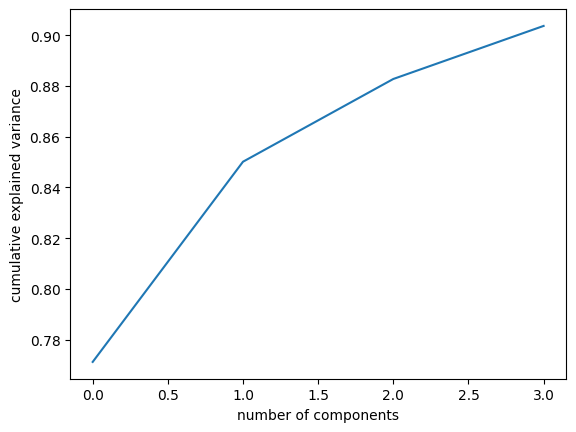

In [17]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [18]:
X = df.drop('Anemia level', 1)


<ipython-input-18-f009244be8eb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Anemia level', 1)


In [19]:
y = df['Anemia level']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
849/849 [==============================] - 2s 2ms/step - loss: 0.7568 - accuracy: 0.7620
Epoch 2/100
849/849 [==============================] - 1s 2ms/step - loss: 0.7339 - accuracy: 0.7699
Epoch 3/100
849/849 [==============================] - 1s 2ms/step - loss: 0.7342 - accuracy: 0.7699
Epoch 4/100
849/849 [==============================] - 1s 2ms/step - loss: 0.7308 - accuracy: 0.7699
Epoch 5/100
849/849 [==============================] - 2s 2ms/step - loss: 0.7306 - accuracy: 0.7699
Epoch 6/100
849/849 [==============================] - 2s 3ms/step - loss: 0.7278 - accuracy: 0.7699
Epoch 7/100
849/849 [==============================] - 1s 2ms/step - loss: 0.7269 - accuracy: 0.7699
Epoch 8/100
849/849 [==============================] - 1s 2ms/step - loss: 0.7268 - accuracy: 0.7699
Epoch 9/100
849/849 [==============================] - 1s 2ms/step - loss: 0.7264 - accuracy: 0.7699
Epoch 10/100
849/849 [==============================] - 2s 2ms/step - loss: 0.7242 - accura

In [21]:
y_pred = model.predict(X_test)

213/213 [==============================] - 0s 1ms/step


In [22]:
for i in range(1,200):
  print("Valor real: ", y_test.iloc[i], " valor predecido: ", np.argmax(y_pred[i]))

Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  1  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  2  valor predecido:  0
Valor real:  1  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  1  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  2  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  1  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  0  valor predecido:  0
Valor real:  2  valor predecido:  0
Valor real:  1  valor predec